# Exercise: Predict Diabetes with a Linear Regression Model

In this exercise, we'll predict a patient's diabetes desease progression from different health indicators such as body mass index, age, blood pressure etc. 

Your tasks are the following:

- Get an overview of the dataset
- Plot a histogram of the data
- Plot the correlation matrix
- Split into training and test data
- Train a linear regression model
- Evaluate the model and plot the results

## 1. Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**TODO**: Load in the diabetes dataset from scikit-learn and get familiar with the dataset. Find out these basic properties:

- How many samples does the dataset have?
- How many features does the dataset have?
- Are there any null values that we have to take care of?
- Has the data been standardized already or do we have to take care of this?
- Does the dataset contain numerical or categorical values or both?

In [34]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
list(diabetes)
#print(diabetes.DESCR)
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
dfd['target'] = diabetes['target']
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**YOUR ANSWER**:

**TODO**: Plot a histogram in matplotlib to get an overview of the data.

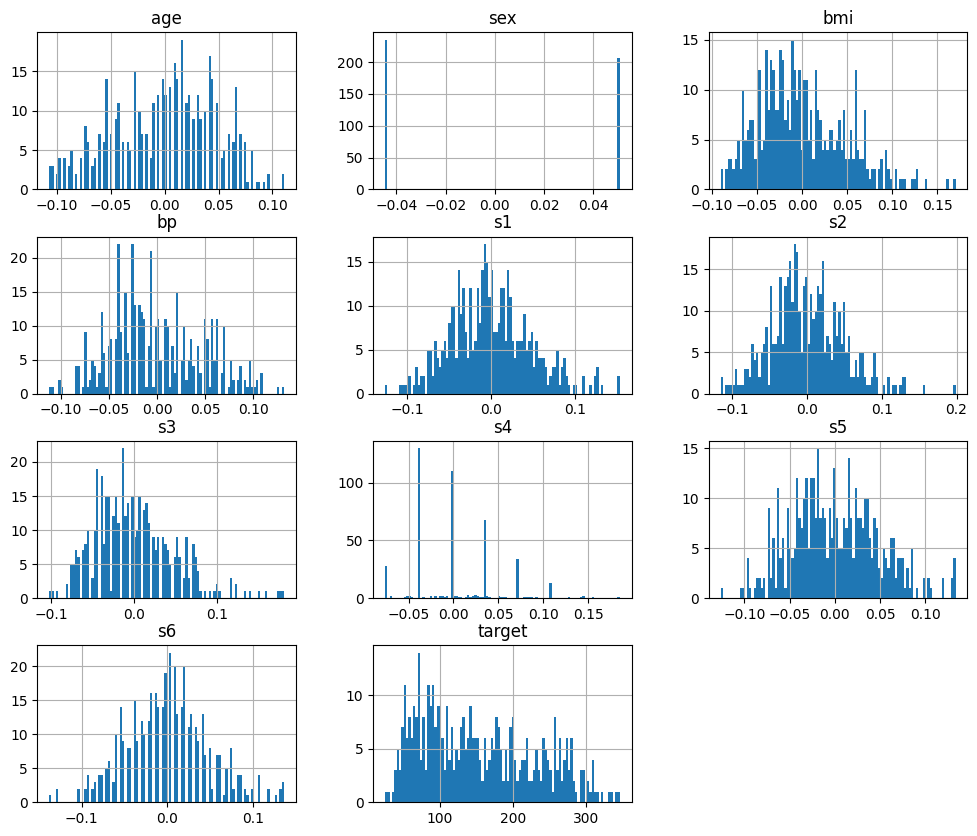

In [42]:
dfd.hist(bins=100, figsize=(12,10))
plt.show()

**TODO**: Calculate the linear correlation matrix of the features and the target and plot the results. Which feature is the most important for our prediction goal?

In [44]:
corr_matrix = dfd.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

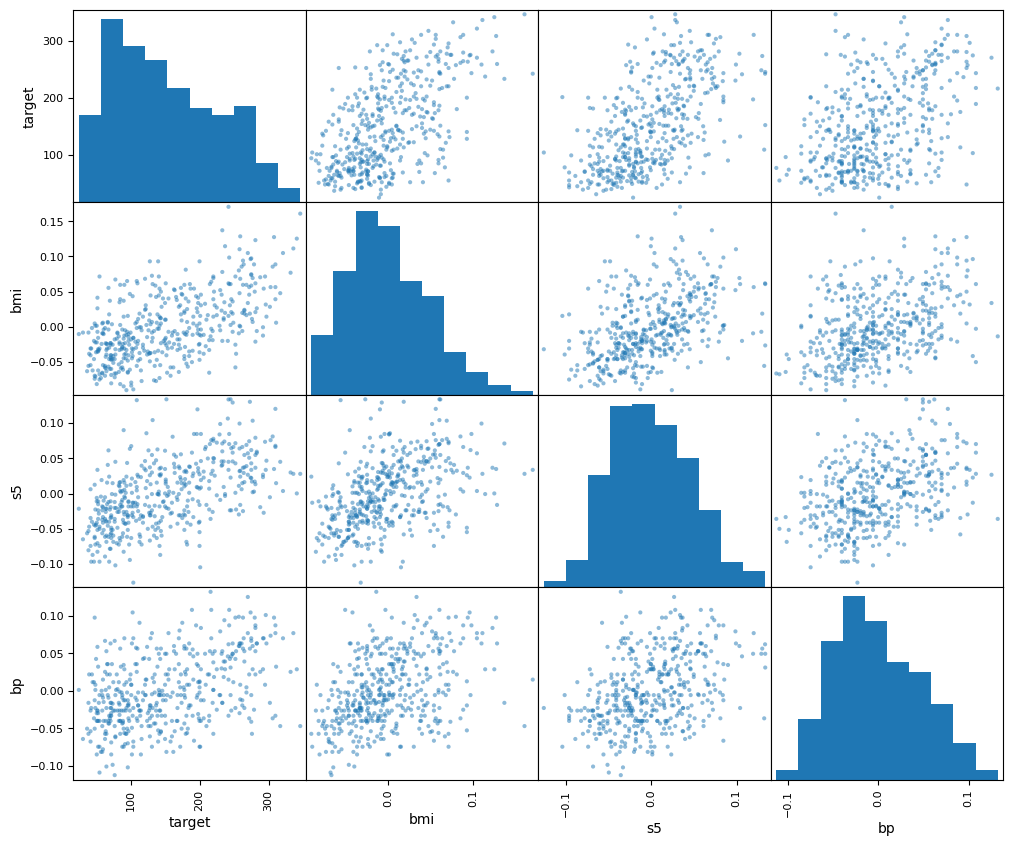

In [46]:
from pandas.plotting import scatter_matrix
features = ["target", "bmi", "s5", "bp"]
scatter_matrix(dfd[features], figsize=(12,10))
plt.show()

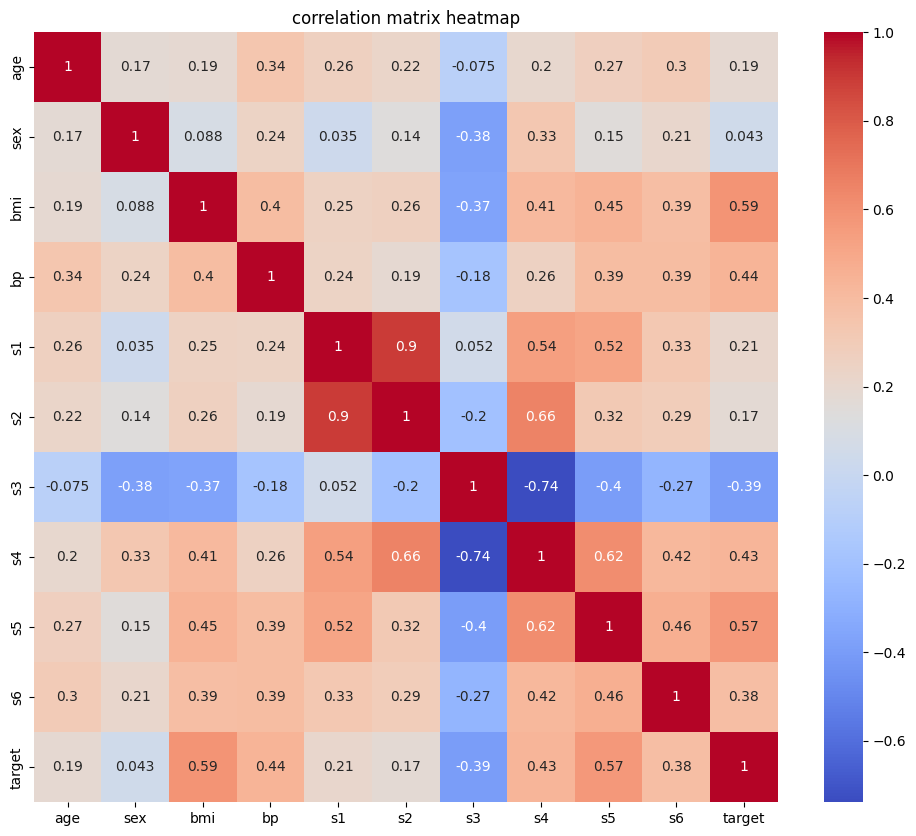

In [48]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("correlation matrix heatmap")
plt.show()

**YOUR ANSWER**:

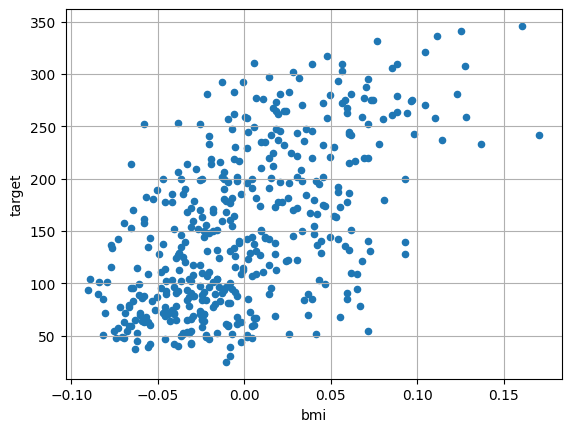

In [47]:
dfd.plot(kind="scatter", x="bmi", y="target", grid=True)
plt.show()

## 2. Training and Evaluation

**TODO**: Store the features and labels in dataframes called `X` and `y`, respectively. Create a train and test split with 80% training data and 20% test data.

In [51]:
from sklearn.model_selection import train_test_split
y = dfd["target"]
X = dfd.drop("target", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**TODO**: Create and train a linear regression model.

In [52]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

**TODO**: Evaluate the model on the test dataset: make predictions and calculate the RMSE.

In [59]:
lr_model.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
print(y_pred_test[:10].round(0))
print(y_test[:10].values)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_pred_test, y_test)
print(rmse)

[238. 249. 164. 120. 187. 259. 114. 188. 149. 236.]
[321. 215. 127.  64. 175. 275. 179. 232. 142.  99.]
58.51717127731562


**TODO**: Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements. Do you think we have found a reasonable model according to the plot?

In [70]:
X_train_bmi = X_train[["bmi"]]
print(X_train_bmi)
X_test_bmi = X_test[["bmi"]]
model = LinearRegression()
model.fit(X_train_bmi, y_train)

          bmi
74   0.002417
26  -0.077342
45  -0.035307
389  0.001339
154  0.020739
..        ...
323 -0.007284
192 -0.030996
117 -0.021295
47  -0.073030
172  0.071397

[353 rows x 1 columns]


LinearRegression()

**YOUR ANSWER**:

In [71]:
simple_predictions_train = model.predict(X_train_bmi)
simple_predictions_test = model.predict(X_test_bmi)

In [76]:
simple_rmse_train = root_mean_squared_error(simple_predictions_train, y_train)
print("simple_rmse_train is:", simple_rmse_train)
simple_rmse_test = root_mean_squared_error(simple_predictions_test, y_test)
print("simple_rmse_test is:", simple_rmse_test)

simple_rmse_train is: 61.86936801367363
simple_rmse_test is: 64.42577271038341


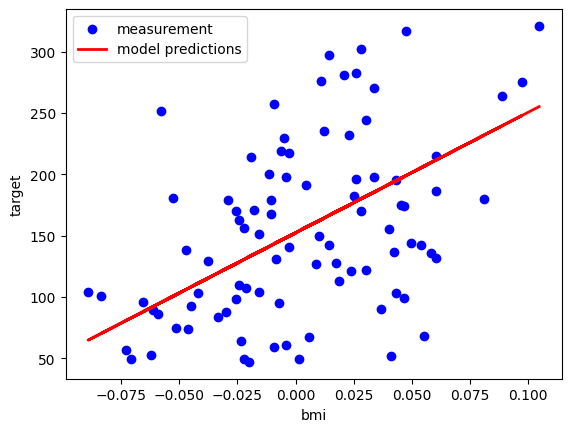

In [77]:
plt.scatter(X_test_bmi, y_test, color='blue', label='measurement')
plt.plot(X_test_bmi, simple_predictions_test, color='red', linewidth=2, label="model predictions")
plt.xlabel("bmi")
plt.ylabel('target')
plt.legend(loc='upper left')
plt.show()